In [64]:
.libPaths('/root/miniconda3/envs/Rdoc/lib/R/library')

In [65]:
setwd('/import/a.wangsheng/')

In [66]:
data = read.table('./prot2.txt',header =T,sep = '\t')

In [132]:
data = data[!duplicated(data$Gene),]

In [133]:
Vesicle_target = c('Vamp3','ExOc8','Psen2','Tmed9','Vamp8','Rab5c','Copb1','Rab2a','Sar1a','Rab10','Rab5a','Rab7',
                  'Tubb4b','Tubb5','Dock2','Cdc42','Myh9','Actb','Ehd2','Atl2','Icam2')

In [134]:
Membrane_Fusion = c('Arl8b','Stx12','Gnai3','Uso1','Stxbp2','Stx11','Nsf','Flot1','Flot2',
                   'Dnm1','Dnm2','Clta','Ap1b1','Stoml2','Itgb2')

In [135]:
library(dplyr)

[1] "Gene"           "NE_MT_membrane"

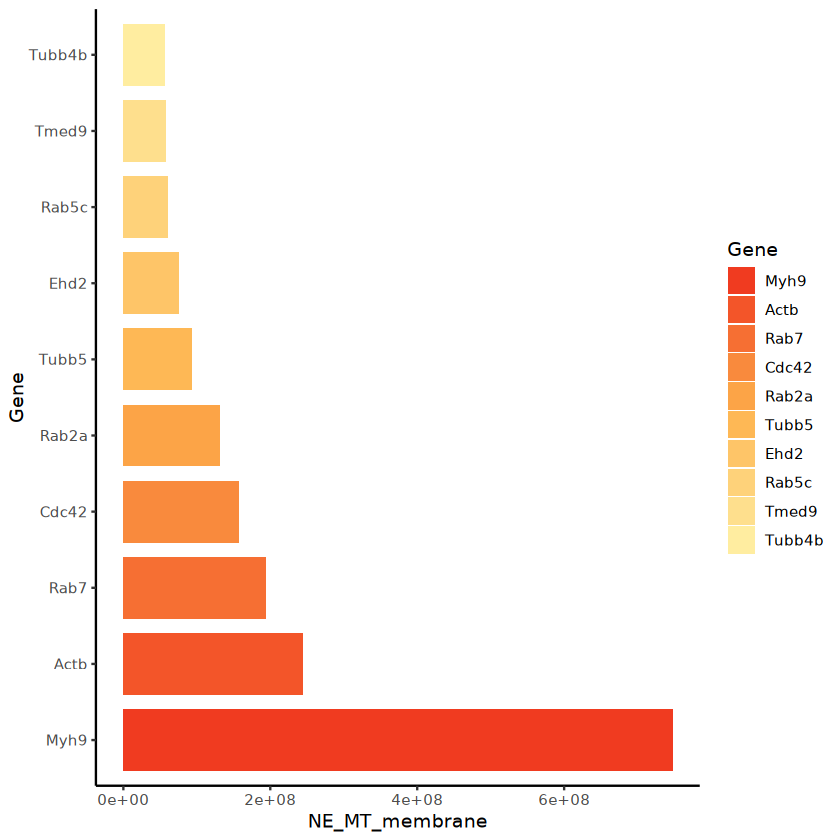

In [136]:
d1 = data %>%  dplyr::filter(Gene %in% Vesicle_target )

d1 = d1[!duplicated(d1$Gene),]

d1 = d1[order(d1[,2],decreasing =T),] 
d1 = d1[1:10,]

library(RColorBrewer)

library(ggplot2)

colnames(d1)



d1$Gene = factor(d1$Gene ,levels = d1$Gene)

cols = brewer.pal(3, "YlOrRd")

pal<-colorRampPalette(cols)
color<-pal(nrow(d1))

p <- 
  ggplot(data=d1, aes(x=Gene, y=NE_MT_membrane, 
                            fill=Gene)) +
  geom_bar(stat="identity", width=0.8)  +scale_fill_manual(values = rev(color)) + 
coord_flip() + theme_classic()
                      

p

In [137]:
ggsave(file = 'figure1.pdf',width = 6,height = 6)

[1] "Gene"           "NE_MT_membrane"

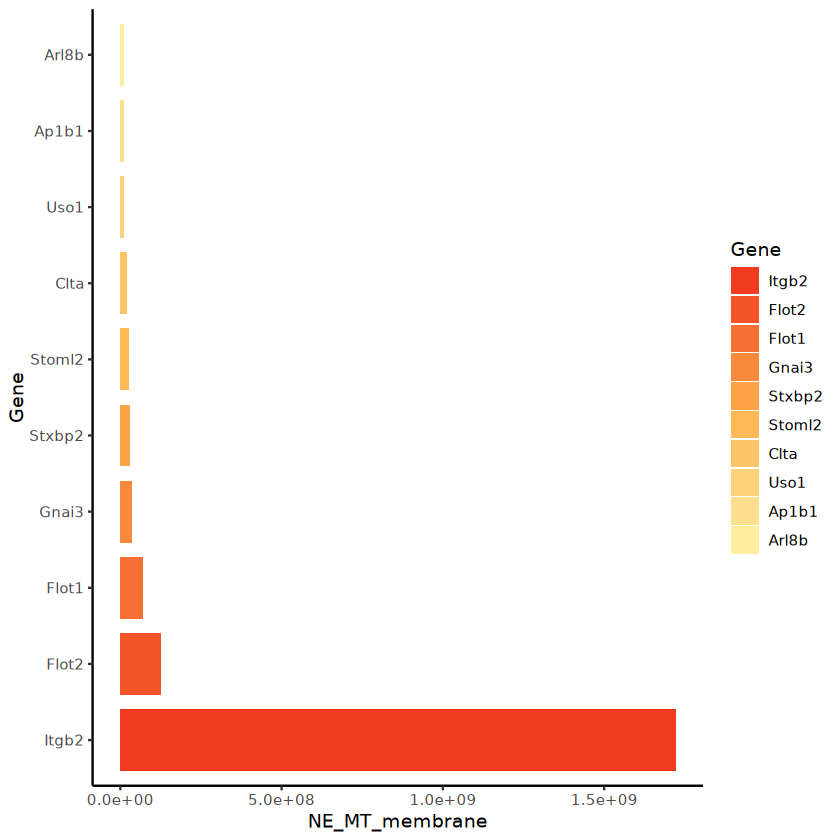

In [138]:
d11 = data %>%  dplyr::filter(Gene %in% Membrane_Fusion )

d11 = d11[!duplicated(d11$Gene),]

d11 = d11[order(d11[,2],decreasing =T),] 
d11 = d11[1:10,]

library(RColorBrewer)

library(ggplot2)

colnames(d11)



d11$Gene = factor(d11$Gene ,levels = d11$Gene)

cols = brewer.pal(3, "YlOrRd")

pal<-colorRampPalette(cols)
color<-pal(nrow(d11))

p <- 
  ggplot(data=d11, aes(x=Gene, y=NE_MT_membrane, 
                            fill=Gene)) +
  geom_bar(stat="identity", width=0.8)  +scale_fill_manual(values = rev(color)) + 
coord_flip() + theme_classic()
                      

p

In [139]:
ggsave(file = 'figure2.pdf',width = 6,height = 6)

In [140]:
d1$Gene

[1] Myh9   Actb   Rab7   Cdc42  Rab2a  Tubb5  Ehd2   Rab5c  Tmed9  Tubb4b
Levels: Myh9 Actb Rab7 Cdc42 Rab2a Tubb5 Ehd2 Rab5c Tmed9 Tubb4b

In [141]:
d11$Gene

[1] Itgb2  Flot2  Flot1  Gnai3  Stxbp2 Stoml2 Clta   Uso1   Ap1b1  Arl8b 
Levels: Itgb2 Flot2 Flot1 Gnai3 Stxbp2 Stoml2 Clta Uso1 Ap1b1 Arl8b

In [142]:
require(ggplot2)
require(moonBook)
library(webr)
aa = c(d1$Gene,d11$Gene)
da2 = data %>%  filter(Gene %in%  aa)

[1] 15

,Gene,NE_MT_membrane,type
,<chr>,<dbl>,<chr>
1,Myh9,747231814,Vesicle_target
2,Itgb2,1720506386,Vesicle_target
3,Actb,243901183,Vesicle_target
4,Tubb4b,55656456,Vesicle_target
5,Tubb5,92145068,Vesicle_target
6,Flot2,125489778,Vesicle_target


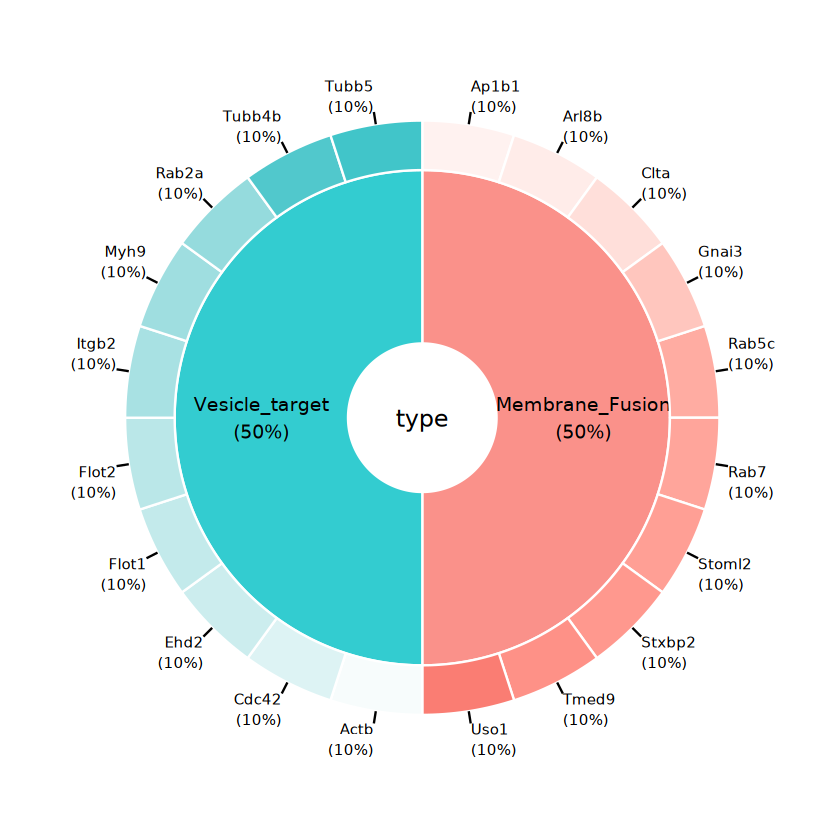

In [144]:

da2$type = c(rep('Vesicle_target',10),rep('Membrane_Fusion',10))

length(Membrane_Fusion)

da2 = da2[!duplicated(da2$Gene),]

head(da2)

p = PieDonut(da2,aes(pies=type,donuts=Gene),addPieLabel =FALSE,addDonutLabel = FALSE,
        title="")

In [145]:
ls()

[1] "aa"              "color"           "cols"            "d1"             
 [5] "d11"             "da2"             "data"            "Membrane_Fusion"
 [9] "p"               "pal"             "test"            "Vesicle_target"

In [146]:
save(aa,color,cols,d1,d11,da2,data,Membrane_Fusion,p,pal,test,Vesicle_target,file = "study1.RData")

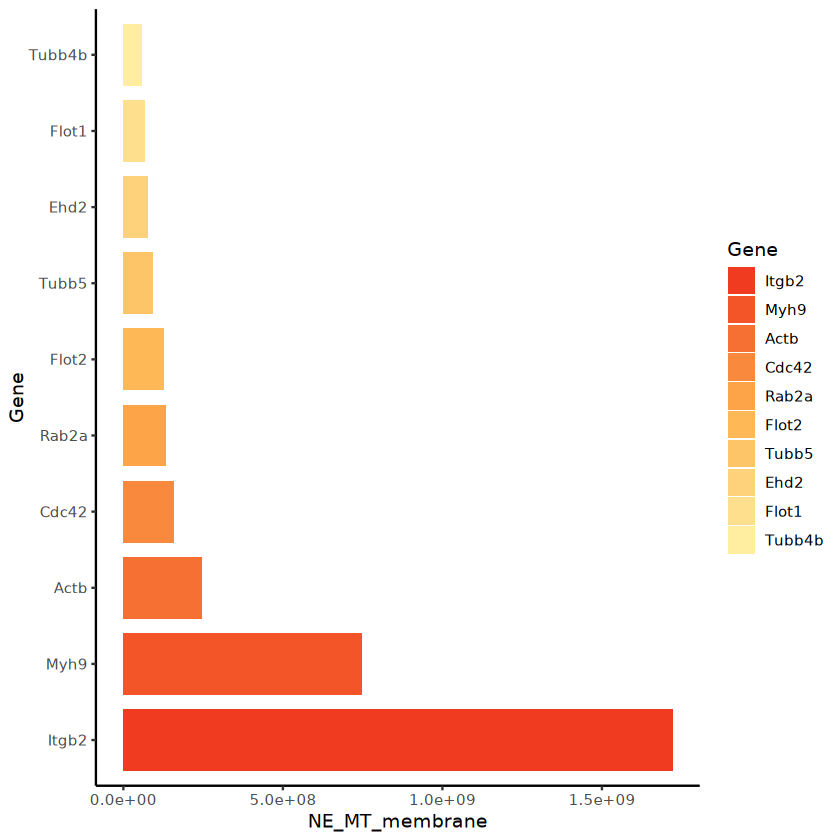

In [151]:
s1 = da2 %>%  dplyr::filter(type == 'Vesicle_target')
s1 = s1[order(s1[,2],decreasing =T),] 


s2 = da2 %>%  dplyr::filter(type == 'Membrane_Fusion')
s2 = s2[order(s2[,2],decreasing =T),] 


s3 = rbind(s1,s2)
s3$Gene = factor(s3$Gene ,levels = s3$Gene)




s1$Gene = factor(s1$Gene ,levels = s1$Gene)
library(RColorBrewer)
library(ggplot2)
cols = brewer.pal(3, "YlOrRd")
pal<-colorRampPalette(cols)
color<-pal(nrow(s1))
p <- 
  ggplot(data=s1, aes(x=Gene, y=NE_MT_membrane, 
                      fill=Gene)) +
  geom_bar(stat="identity", width=0.8)  +scale_fill_manual(values = rev(color)) + 
  coord_flip() + theme_classic()
p


In [152]:
ggsave(file = 'figure1.pdf',width = 6,height = 6)

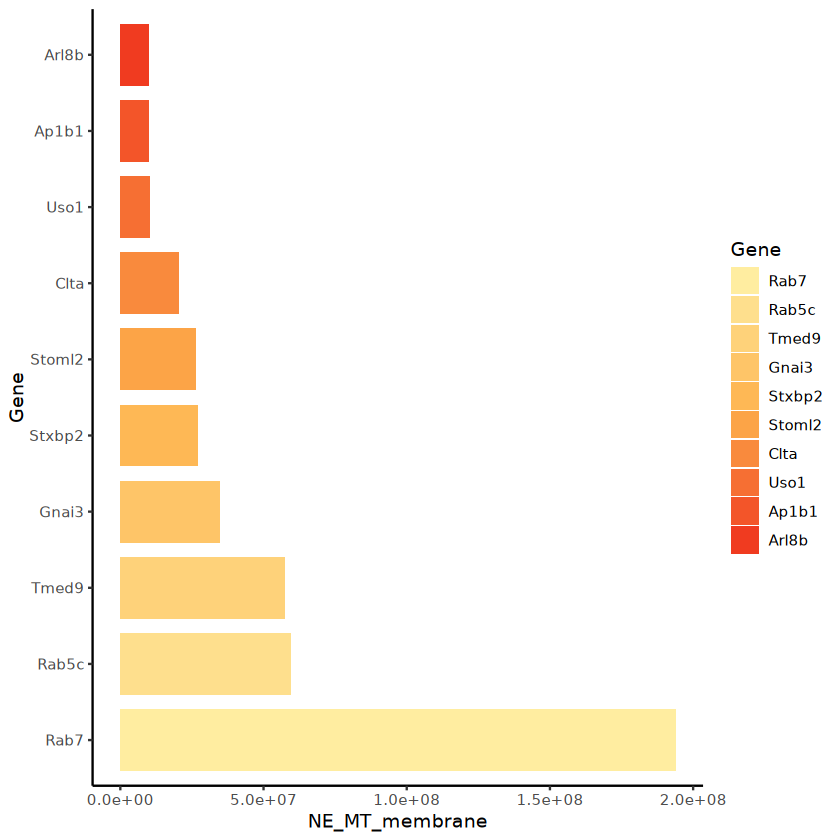

In [161]:
s2$Gene = factor(s2$Gene ,levels = s2$Gene)
library(RColorBrewer)
library(ggplot2)
cols = brewer.pal(3, "YlOrRd")
pal<-colorRampPalette(cols)
color2<-pal(nrow(s2))
p <- 
  ggplot(data=s2, aes(x=Gene, y=NE_MT_membrane, 
                      fill=Gene)) +
  geom_bar(stat="identity", width=0.8)  +scale_fill_manual(values = color2) + 
  coord_flip() + theme_classic() 
p


In [154]:
ggsave(file = 'figure2.pdf',width = 6,height = 6)

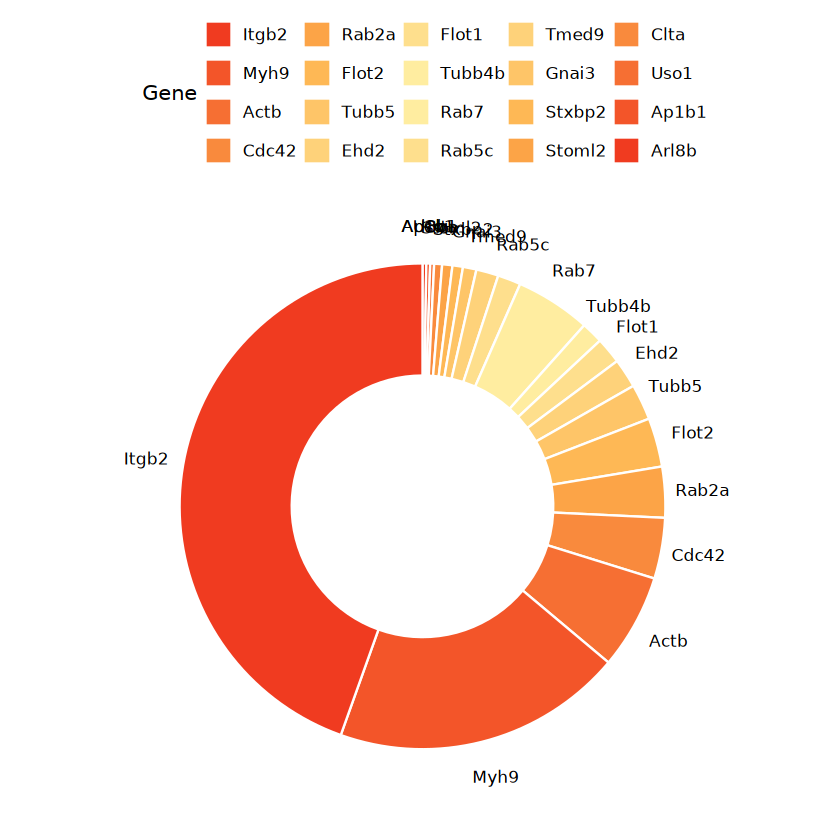

In [155]:
my_colors <- c(c(rev(color),color2))

library(ggpubr)
ggdonutchart(s3, "NE_MT_membrane",
             label = 'Gene',                               
             fill = "Gene",                            
            color = 'white',
            palette = my_colors
)


In [156]:
ggsave(file = 'figure3.pdf',width = 6,height = 6)

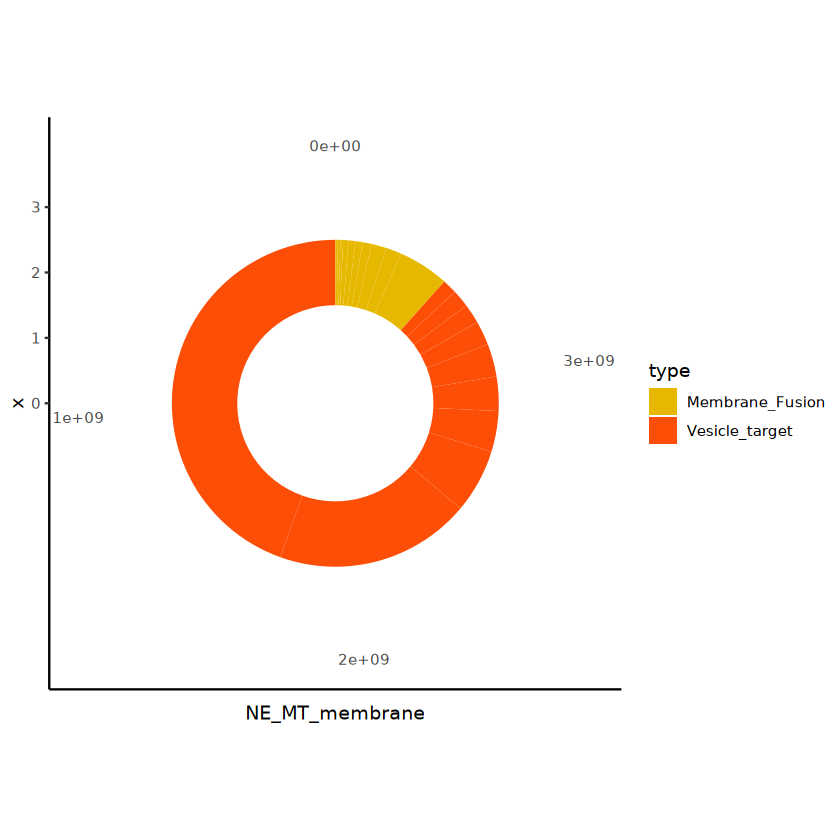

In [166]:
ggplot(s3) +
  geom_col(aes(x = 2, y = NE_MT_membrane, fill = type), width= 1) +
  #geom_col(aes(x = 3, y = NE_MT_membrane, fill = Gene), width= 1)+
  coord_polar("y") +
  xlim(0, 3.5) +theme_classic()+scale_fill_manual(values = c( "#E7B800", "#FC4E07"))+ scale_y_reverse()

In [167]:
ggsave(file = 'figure4.pdf',width = 6,height = 6)